In [1]:
DATA_PATH="/content/drive/MyDrive/수업자료/머신러닝/human_activity"

FEATURE_NAME_PATH  = DATA_PATH + "/features.txt"

TRAIN_FEATURE_PATH = DATA_PATH + "/train/X_train.txt"
TRAIN_LABEL_PATH   = DATA_PATH + "/train/y_train.txt"

TEST_FEATURE_PATH  = DATA_PATH + "/test/X_test.txt"
TEST_LABEL_PATH    = DATA_PATH + "/test/y_test.txt"

In [2]:
import pandas as pd

def get_human_dataset( ):

    def get_new_feature_name_df(old_feature_name_df):
      feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(), columns=['dup_cnt'])
      feature_dup_df = feature_dup_df.reset_index()
      new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
      new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1]) if x[1] >0 else x[0],  axis=1)
      new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
      return new_feature_name_df

    # 각 데이터 파일들은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당.
    feature_name_df = pd.read_csv(FEATURE_NAME_PATH, sep='\s+', header=None,names=['column_index','column_name'])
    
    # 중복된 피처명을 수정하는 get_new_feature_name_df()를 이용, 신규 피처명 DataFrame생성. 
    new_feature_name_df = get_new_feature_name_df(feature_name_df)
    
    # DataFrame에 피처명을 컬럼으로 부여하기 위해 리스트 객체로 다시 변환
    feature_name = new_feature_name_df.iloc[:, 1].values.tolist()
    
    # 학습 피처 데이터 셋과 테스트 피처 데이터을 DataFrame으로 로딩. 컬럼명은 feature_name 적용
    X_train = pd.read_csv(TRAIN_FEATURE_PATH,sep='\s+', names=feature_name )
    X_test = pd.read_csv(TEST_FEATURE_PATH,sep='\s+', names=feature_name)
    
    # 학습 레이블과 테스트 레이블 데이터을 DataFrame으로 로딩하고 컬럼명은 action으로 부여
    y_train = pd.read_csv(TRAIN_LABEL_PATH,sep='\s+',header=None,names=['action'])
    y_test = pd.read_csv(TEST_LABEL_PATH,sep='\s+',header=None,names=['action'])
    
    # 로드된 학습/테스트용 DataFrame을 모두 반환 
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_human_dataset()

In [3]:
X_train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


In [4]:
y_train.head()

,action
0,5
1,5
2,5
3,5
4,5


# feature, label 개수 확인

In [5]:
X_train.shape, y_train.shape

((7352, 561), (7352, 1))

In [7]:
X_test.shape, y_test.shape

((2947, 561), (2947, 1))

# 타겟의 비율 확인  
- 불균형한 데이터인지 확인

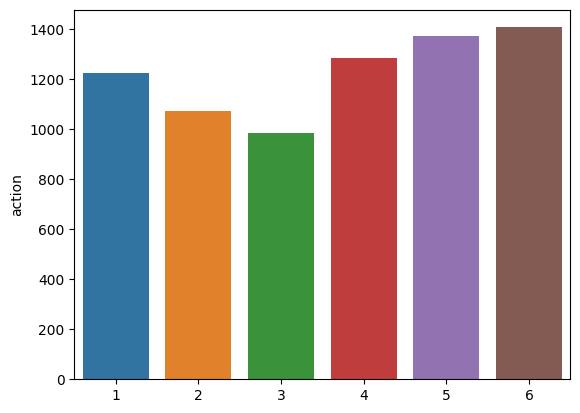

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(
    x=y_train['action'].value_counts().index,
    y=y_train['action'].value_counts()
)

plt.show()

# DecisionTreeClassifier

In [11]:
from sklearn.tree import DecisionTreeClassifier

dt_human_clf = DecisionTreeClassifier().fit(X_train,y_train)

In [12]:
# accuracy_score가 아닌, 모델 자체에서 정확도 구하기
train_score = dt_human_clf.score(X_train,y_train) # predict -> accuracy_score 호출해서 점수 리턴
test_score = dt_human_clf.score(X_test, y_test)

print("훈련세트 점수 : {:.3f}".format(train_score))
print("테스트세트 점수 : {:.3f}".format(test_score))

훈련세트 점수 : 1.000
테스트세트 점수 : 0.857


## 교차검증

In [13]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(
    DecisionTreeClassifier(),
    X_train,
    y_train,
    cv=5,
    scoring="accuracy"
)

print("교차검증 결과: {}".format(scores))
print("교차검증 평균: {}".format(scores.mean()))

교차검증 결과: [0.81645139 0.80829368 0.82653061 0.88027211 0.88027211]
교차검증 평균: 0.8423639802623974


# 그리드리서치 수행
- 그리드리서치는 일반적으로 꼭 쓸 것

In [15]:
from sklearn.model_selection import GridSearchCV

params = {
    "max_depth" : [8,12,16,20],
    "min_samples_split" : [16,24]
}

dt_grid_search = GridSearchCV(
    DecisionTreeClassifier(),
    param_grid = params,
    cv=5,
    scoring="accuracy"
)

dt_grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [8, 12, 16, 20],
                         'min_samples_split': [16, 24]},
             scoring='accuracy')

In [18]:
# cv_result는 제이슨형식으로 표현됨 -> 데이터프레임으로 변환 가능
# param으로 시작하는 피쳐와 params 를 주로 살펴볼 것
cv_results_df= pd.DataFrame(dt_grid_search.cv_results_)
cv_results_df[["param_max_depth","param_min_samples_split","mean_test_score"]]

,param_max_depth,param_min_samples_split,mean_test_score
0,8,16,0.850798
1,8,24,0.850797
2,12,16,0.842775
3,12,24,0.844814
4,16,16,0.845904
5,16,24,0.852023
6,20,16,0.845222
7,20,24,0.845222


# 특성 중요도 확인

In [19]:
best_tree = dt_grid_search.best_estimator_

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
def plot_feature_importance(model, columns, limit=None):
 
  ftr_importances_values = model.feature_importances_
  # Top 중요도로 정렬을 쉽게 하고, 시본(Seaborn)의 막대그래프로 쉽게 표현하기 위해 Series변환
  ftr_importances = pd.Series(ftr_importances_values, index=columns  )
  # 중요도값 순으로 Series를 정렬
  ftr_top = ftr_importances.sort_values(ascending=False)[:limit]
  plt.figure(figsize=(8,6))
  plt.title(f'Feature importances Top {len(columns) if limit == None else limit}')
  sns.barplot(x=ftr_top , y = ftr_top.index)
  plt.show()

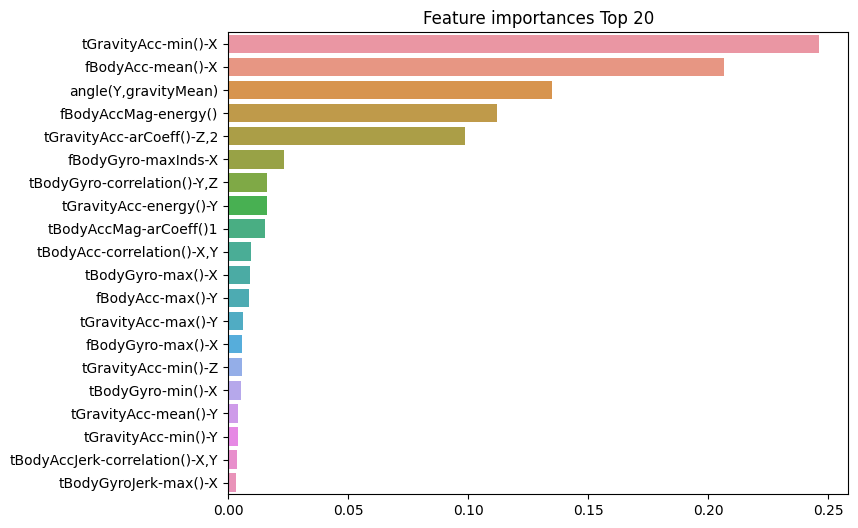

In [21]:
plot_feature_importance(best_tree,X_train.columns,20)

# 테스트 세트 평가(Evaluate)

In [22]:
best_tree.score(X_test,y_test)

0.8568035290125552

# RandomForestCalssifier

In [24]:
from sklearn.ensemble import RandomForestClassifier

params = {
    "n_estimators" :[10,100]
}

rf_grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid=params,
    scoring="accuracy",
    cv=5
)

In [25]:
rf_grid_search.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'n_estimators': [10, 100]}, scoring='accuracy')

In [35]:
cv_results_df1= pd.DataFrame(rf_grid_search.cv_results_)
cv_results_df1[["mean_test_score"]]


,mean_test_score
0,0.895813
1,0.917169


In [29]:
rf_best_tree = rf_grid_search.best_estimator_

In [30]:
rf_best_tree.score(X_test,y_test)

0.9256871394638616

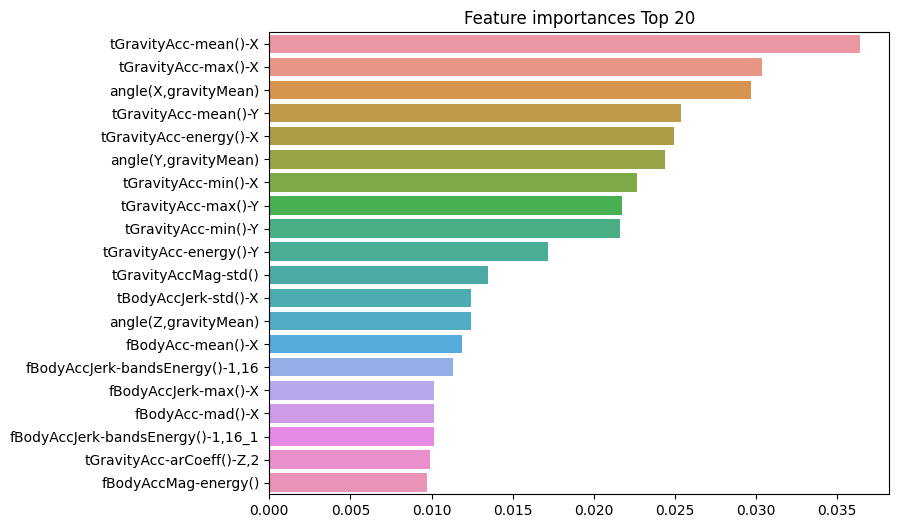

In [31]:
plot_feature_importance(rf_best_tree,X_train.columns,20)